# Codebase for Data Preprocessing

## Things that have done
1. load raw data
2. data transformation (numeric and categorcial data)
3. univariate and multivariate exploratory data analysis (EDA)
4. correlation analysis
5. text preprocessing using NLP techniques
6. data export

In [1]:
# load raw data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/complete_data.csv")

In [2]:
# print data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        2457 non-null   object 
 1   artist            2457 non-null   object 
 2   album             2457 non-null   object 
 3   release_date      2457 non-null   object 
 4   duration          2457 non-null   int64  
 5   popularity        2457 non-null   int64  
 6   preview_url       1428 non-null   object 
 7   explicit          2457 non-null   bool   
 8   track_ID          2457 non-null   object 
 9   lyrics            2405 non-null   object 
 10  danceability      2457 non-null   float64
 11  energy            2457 non-null   float64
 12  key               2457 non-null   float64
 13  loudness          2457 non-null   float64
 14  mode              2457 non-null   float64
 15  speechiness       2457 non-null   float64
 16  acousticness      2457 non-null   float64


In [3]:
# check null and duplicate values

# identify null data
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 
# There are 26 missing value in lyrics--> will be handled

# identify duplciate data
print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum())) # No duplicate values

Number of null values in the dataset:
track_name             0
artist                 0
album                  0
release_date           0
duration               0
popularity             0
preview_url         1029
explicit               0
track_ID               0
lyrics                52
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
type                   0
id                     0
uri                    0
track_href             0
analysis_url           0
duration_ms            0
time_signature         0
dtype: int64

Number of duplicate data in the dataset:
23


In [4]:
# check duration and duration_ms
print(df['duration'])
print(df['duration_ms'])

# drop duration_ms
df.drop(columns=['duration_ms'], inplace=True)
df.info()

0       200040
1       233712
2       182160
3       157560
4       230453
         ...  
2452    193636
2453    214013
2454    137760
2455    158965
2456    236215
Name: duration, Length: 2457, dtype: int64
0       200040.0
1       233713.0
2       182161.0
3       157560.0
4       230453.0
          ...   
2452    193636.0
2453    214013.0
2454    137760.0
2455    157252.0
2456    236216.0
Name: duration_ms, Length: 2457, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        2457 non-null   object 
 1   artist            2457 non-null   object 
 2   album             2457 non-null   object 
 3   release_date      2457 non-null   object 
 4   duration          2457 non-null   int64  
 5   popularity        2457 non-null   int64  
 6   preview_url       1428 non-null   object 
 7   explicit          2457

In [5]:
df.columns

Index(['track_name', 'artist', 'album', 'release_date', 'duration',
       'popularity', 'preview_url', 'explicit', 'track_ID', 'lyrics',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'time_signature'],
      dtype='object')

In [6]:
# drop object columns: track_href, analysis_url, Track ID, id, uri, and type
df.drop(columns=['track_href', 'analysis_url', 'track_ID', 'id', 'uri', 'type'], inplace=True)

print(df.shape) # (2457, 21)

(2457, 21)


In [7]:
# drop preview url
# drop object columns: track_href, analysis_url, Track ID, id, uri, and type
df.drop(columns=['preview_url'], inplace=True)

print(df.shape) # (2457, 20)

(2457, 20)


In [8]:
df.columns

Index(['track_name', 'artist', 'album', 'release_date', 'duration',
       'popularity', 'explicit', 'lyrics', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [9]:
# DATA PREPPROCESSING (Part 1: numbers)

# 1. binary encode boolean feature (explicit) 
# print(df['explicit'].value_counts())
df['explicit']=df['explicit'].astype(int)
# print(df['explicit'].value_counts()) # 1719 F (0), 738 T (1)

In [10]:
# # Descriptive/ Summary statistics for continuous data (15 columns)
# numeric_summary=df.describe().style.set_caption('Summary Statistics for Continuous Data').format(precision=2).background_gradient(cmap='Blues')
# display(numeric_summary)

In [11]:
# DATA PREPPROCESSING (Part 2: TEXT)

# check the object columns
# Select columns of type 'object'
object_columns = df.select_dtypes(include=['object']) # 5 columns left
# print(object_columns)
# Artist, Track, Release Date, Album Name, Lyrics

# Convert object column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
print(df['release_date']) # success

0      2020-03-20
1      2017-03-03
2      2019-05-17
3      2019-09-06
4      2016-11-25
          ...    
2452   2021-02-05
2453   2020-01-24
2454   2008-01-29
2455   2023-05-19
2456   2018-12-23
Name: release_date, Length: 2457, dtype: datetime64[ns]


In [12]:
# check null and duplicate values

# identify null data
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 
# There are 26 missing value in lyrics--> will be handled

# identify duplciate data
print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum())) # 23 duplicate values

Number of null values in the dataset:
track_name           0
artist               0
album                0
release_date         0
duration             0
popularity           0
explicit             0
lyrics              52
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Number of duplicate data in the dataset:
23


In [13]:
# impute the 52 songs

# DATA has 1000,20: 20=15(int/float)+4(object/string)+1(datetime)

import lyricsgenius
genius=lyricsgenius.Genius("jCaG2w1CCDLgiXm8JGamJxOdA1Z8eMEKYJhjecctVLM270hsAJkwDBReNzhbZ4Fg", retries=3)

# try to 26 lyrics
# find the songs with missing values
missing_index = df[df.isnull().any(axis=1)].index

# print("Indexes of rows with missing values:")
missing_index_list=list(missing_index)
# print(missing_index_list) # [75, 80, 147, 168, 214, 254, 395, 399, 448, 506, 516, 539, 615, 645, 648, 649, 664, 714, 761, 778, 805, 808, 811, 815, 817, 829]

# impute it manually with the website
for i in missing_index_list:
    try:
        # Attempt to search for the song
        song = genius.search_song(df.loc[i, 'track_name'].split("(", 1)[0], df.loc[i, 'artist'])
        if song:
            # IMPUTE IT 
            df.loc[i, 'lyrics']=song.lyrics
            # temp+=1
        else:
            song2 = genius.search_song(df.loc[i, 'track_name'].split()[0], df.loc[i, 'artist'])
            if song2:
                # IMPUTE IT 
                df.loc[i, 'lyrics']=song2.lyrics
                # temp+=1

    except Exception as e:
        print("Error occurred:", e)


Searching for "Don't Stop Believin' " by Journey...
Done.
Searching for "CAN'T STOP THE FEELING! " by Justin Timberlake...
Done.
Searching for "Gangsta's Paradise " by Coolio...
Done.
Searching for "Danza Kuduro - Cover" by MUSIC LAB JPN...
No results found for: 'Danza Kuduro - Cover MUSIC LAB JPN'
Searching for "Danza" by MUSIC LAB JPN...
Done.
Searching for "Danza Kuduro - Cover" by DJ MIX NON-STOP CHANNEL...
No results found for: 'Danza Kuduro - Cover DJ MIX NON-STOP CHANNEL'
Searching for "Danza" by DJ MIX NON-STOP CHANNEL...
No results found for: 'Danza DJ MIX NON-STOP CHANNEL'
Searching for "Happy - From "Despicable Me 2"" by Pharrell Williams...
No results found for: 'Happy - From "Despicable Me 2" Pharrell Williams'
Searching for "Happy" by Pharrell Williams...
Done.
Searching for "Sweet Dreams " by Eurythmics...
Done.
Searching for "Don't You Worry Child / For You / Save The World - Live from London" by Swedish House Mafia...
No results found for: 'Don't You Worry Child / For 

In [14]:
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum())) 

Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              4
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [15]:
# impute the reamining songs:

# missing_index = df[df.isnull().any(axis=1)].index

# print("Indexes of rows with missing values:")
missing_index_list=[210, 1471, 1668, 2191]
# print(missing_index_list)

# 210 is don omar as artist
# the rest are just title
# 1668 snowfall
# 2191 river flows in you
# 1471 is intro
# df.loc[210, 'track_name']


# manual imputation by changing artist name
# impute it manually with the website
for i in missing_index_list:
    if i==210:
        artist="Don Omar"
        # song = genius.search_song('danza kuduro', "Don Omar")
        # if song:
        #     # IMPUTE IT 
        #     df.loc[i, 'Lyrics']=song.lyrics
    elif i==1471: # artist name
        artist="The xx"
    elif i==1668:
        artist="Øneheart & reidenshi"
    elif i==2191:
        artist="Yiruma"
    try:
        # Attempt to search for the song
        song = genius.search_song(df.loc[i, 'track_name'].split()[0], artist=artist)
        if song:
            # IMPUTE IT 
            df.loc[i, 'lyrics']=song.lyrics

    except Exception as e:
        print("Error occurred:", e)

print(df[df.isnull().any(axis=1)].index)

# remaining ones are instrumental + korean

Searching for "Danza" by Don Omar...
Done.
Searching for "Intro" by The xx...
Specified song does not contain lyrics. Rejecting.
Searching for "snowfall" by Øneheart & reidenshi...
Specified song does not contain lyrics. Rejecting.
Searching for "River" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Int64Index([1471, 1668, 2191], dtype='int64')


In [16]:
# remove duplicate values
# print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum())) # No duplicate values

df[df.duplicated()]
# habits, don't blame me(858 or 1117), (1560 or 1561)

# drop 858 and 1560

df.drop([858, 1560],inplace=True)

In [17]:
print("\nNumber of duplicate data in the dataset:\n{0}".format(df.duplicated().sum())) # 23 duplicate values


Number of duplicate data in the dataset:
21


### EDA

* provide descriptive statistics 

* univariate

* outlier detection through boxplots for continuous data
* frequency analysis through barplot for discrete data
* outlier and unknown removal

* multivariate: pairwise scaterplot(predictor vs y) to see trends, correlation analysis to check multicolinarity (heatmaps)

* Standarizations and multicolinearity?

* write conclusions

In [18]:
# Descriptive/ Summary statistics for continuous data (15 columns)
numeric_summary=df.describe().style.set_caption('Summary Statistics for Continuous Data').format(precision=2).background_gradient(cmap='Blues')
display(numeric_summary)

In [19]:
df.select_dtypes(include=['object'])

track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2452                                            512             Mora   
2453                                          Diosa      Myke Towers   
2454                                         A-Punk  Vampire Weekend   
2455                                            TQM    Fuerza Regida   
2456                                 NI BIEN NI MAL        Bad Bunny   

                                        album  \
0                                 After Hours   
1                                  ÷ (Deluxe)   
2     Divinely Uninspired To A Hellish Extent   
3                        Hollywood's Bleeding   
4                                     Starboy   
...                                       ...   
2452                     Primer Dia de Clases   
2453                          Easy Money Baby   
2454                          Vampire Weekend   
2455                                      TQM   
2456                                 X 100PRE   

                                                 lyrics  
0     234 ContributorsTranslationsTürkçeSvenskaEspañ...  
1     351 ContributorsTranslationsTürkçeEspañolPortu...  
2     223 ContributorsTranslationsSvenskaEspañolPort...  
3     2 ContributorsPost Malone Essentials Lyrics1. ...  
4     519 ContributorsTranslationsTürkçeEspañolРусск...  
...                                                 ...  
2452  25 Contributors512 Lyrics[Letra de "512"]\n\n[...  
2453  17 ContributorsTranslationsEnglishDiosa Lyrics...  
2454  50 ContributorsA-Punk Lyrics[Verse 1]\nJohanna...  
2455  14 ContributorsTQM Lyrics[Letra de "TQM"]\n\n[...  
2456  50 ContributorsTranslationsEnglishDeutschNI BI...  

[2455 rows x 4 columns]

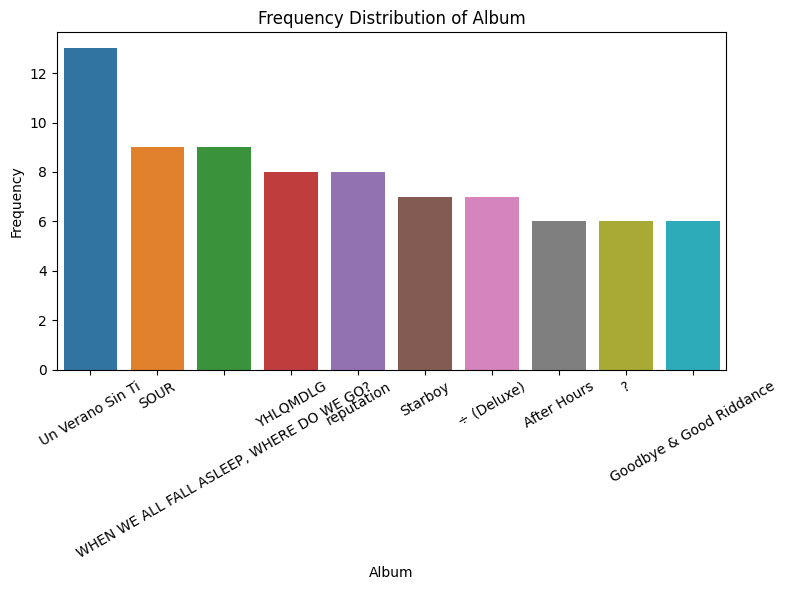

In [20]:
# Frequency analysis
import seaborn as sns

# frequency analysis for categorical variable and encoded numerical variables:
import matplotlib.pyplot as plt

# artist is uniformly distributed
# track is an issue now
# album is interesing though

test=df['album'].value_counts().head(10)

test_df=test.reset_index()
test_df.columns=['Category', 'Frequency']

# Plot the frequency distribution using a boxplot
plt.figure(figsize=(8, 6))
sns.barplot(y='Frequency', x='Category' ,data=test_df)
plt.xlabel('Album')
plt.title('Frequency Distribution of Album')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()



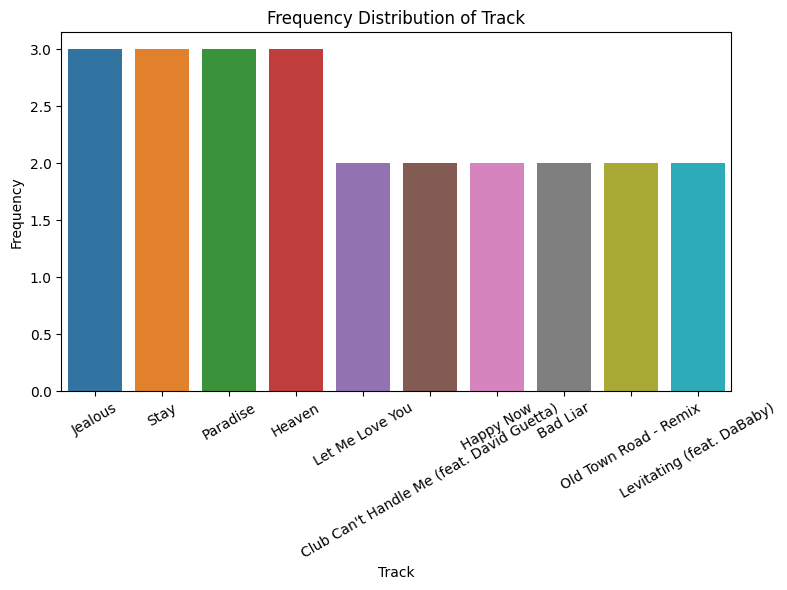

In [21]:
test=df['track_name'].value_counts().head(10)

test_df=test.reset_index()
test_df.columns=['Category', 'Frequency']

# Plot the frequency distribution using a boxplot
plt.figure(figsize=(8, 6))
sns.barplot(y='Frequency', x='Category' ,data=test_df)
plt.xlabel('Track')
plt.title('Frequency Distribution of Track')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

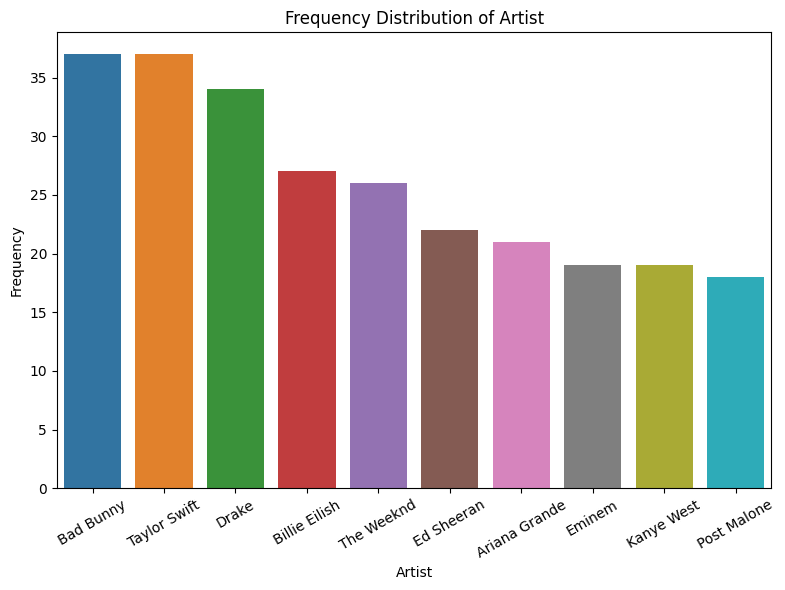

In [22]:
test=df['artist'].value_counts().head(10)

test_df=test.reset_index()
test_df.columns=['Category', 'Frequency']

# Plot the frequency distribution using a boxplot
plt.figure(figsize=(8, 6))
sns.barplot(y='Frequency', x='Category' ,data=test_df)
plt.xlabel('Artist')
plt.title('Frequency Distribution of Artist')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

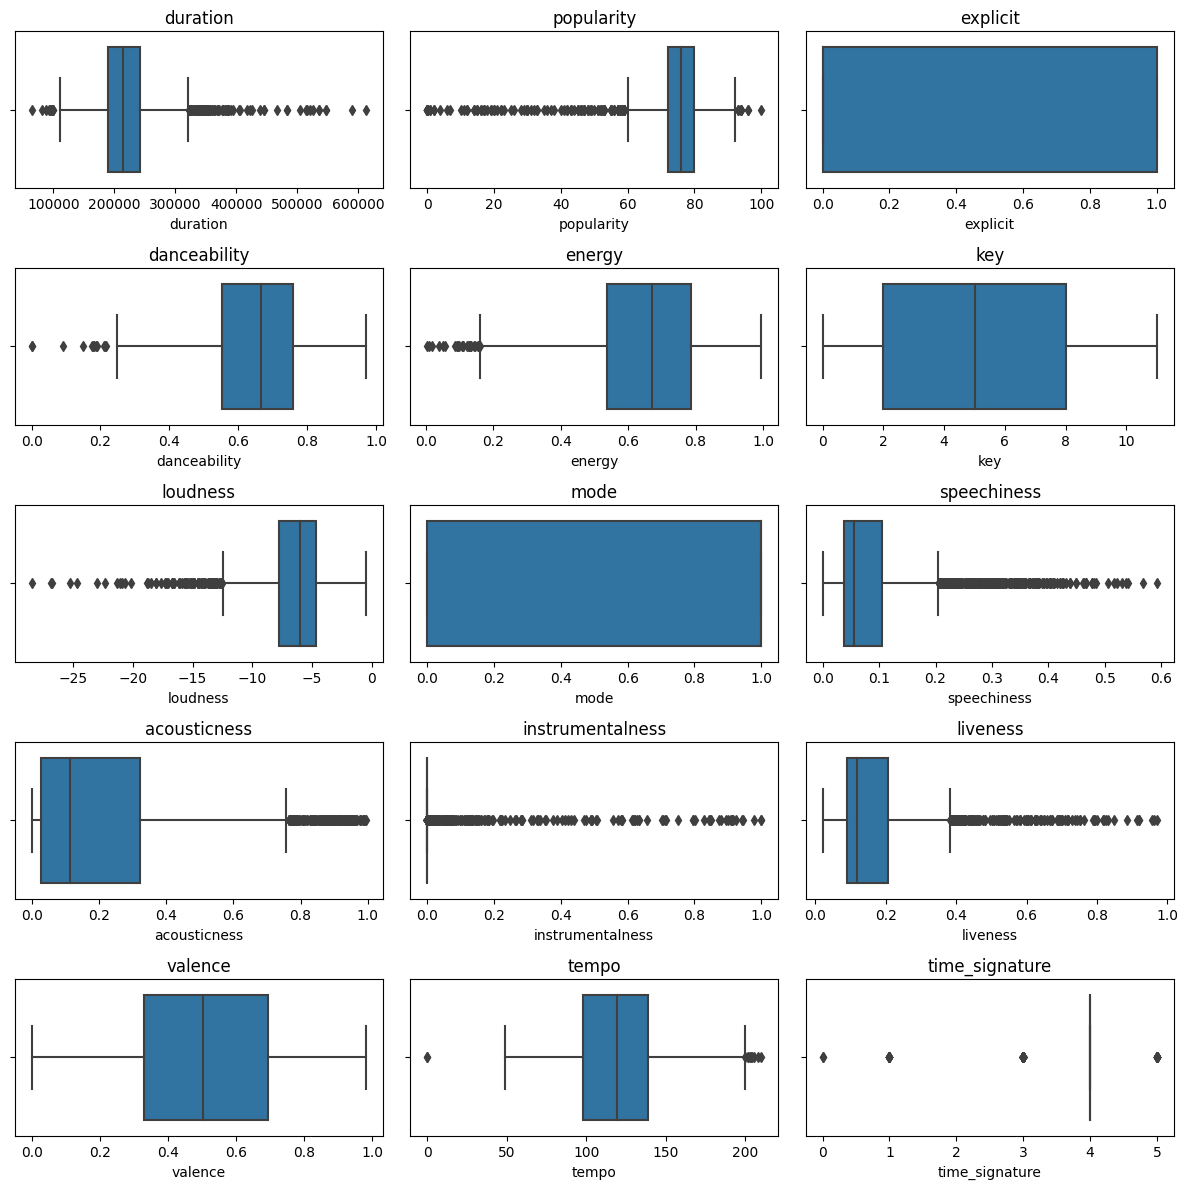

In [23]:
# univariate EDA
# numerical analysis
import matplotlib.pyplot as plt
import seaborn as sns

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# print(df.select_dtypes(include=['number']).columns)

# exclude poutcome and y
# Plot each numeric column's box plot
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    row = i // num_cols
    col = i % num_cols
    if row < num_rows and col < num_cols:
        sns.boxplot(x=df[column], ax=axes[row, col])
        axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


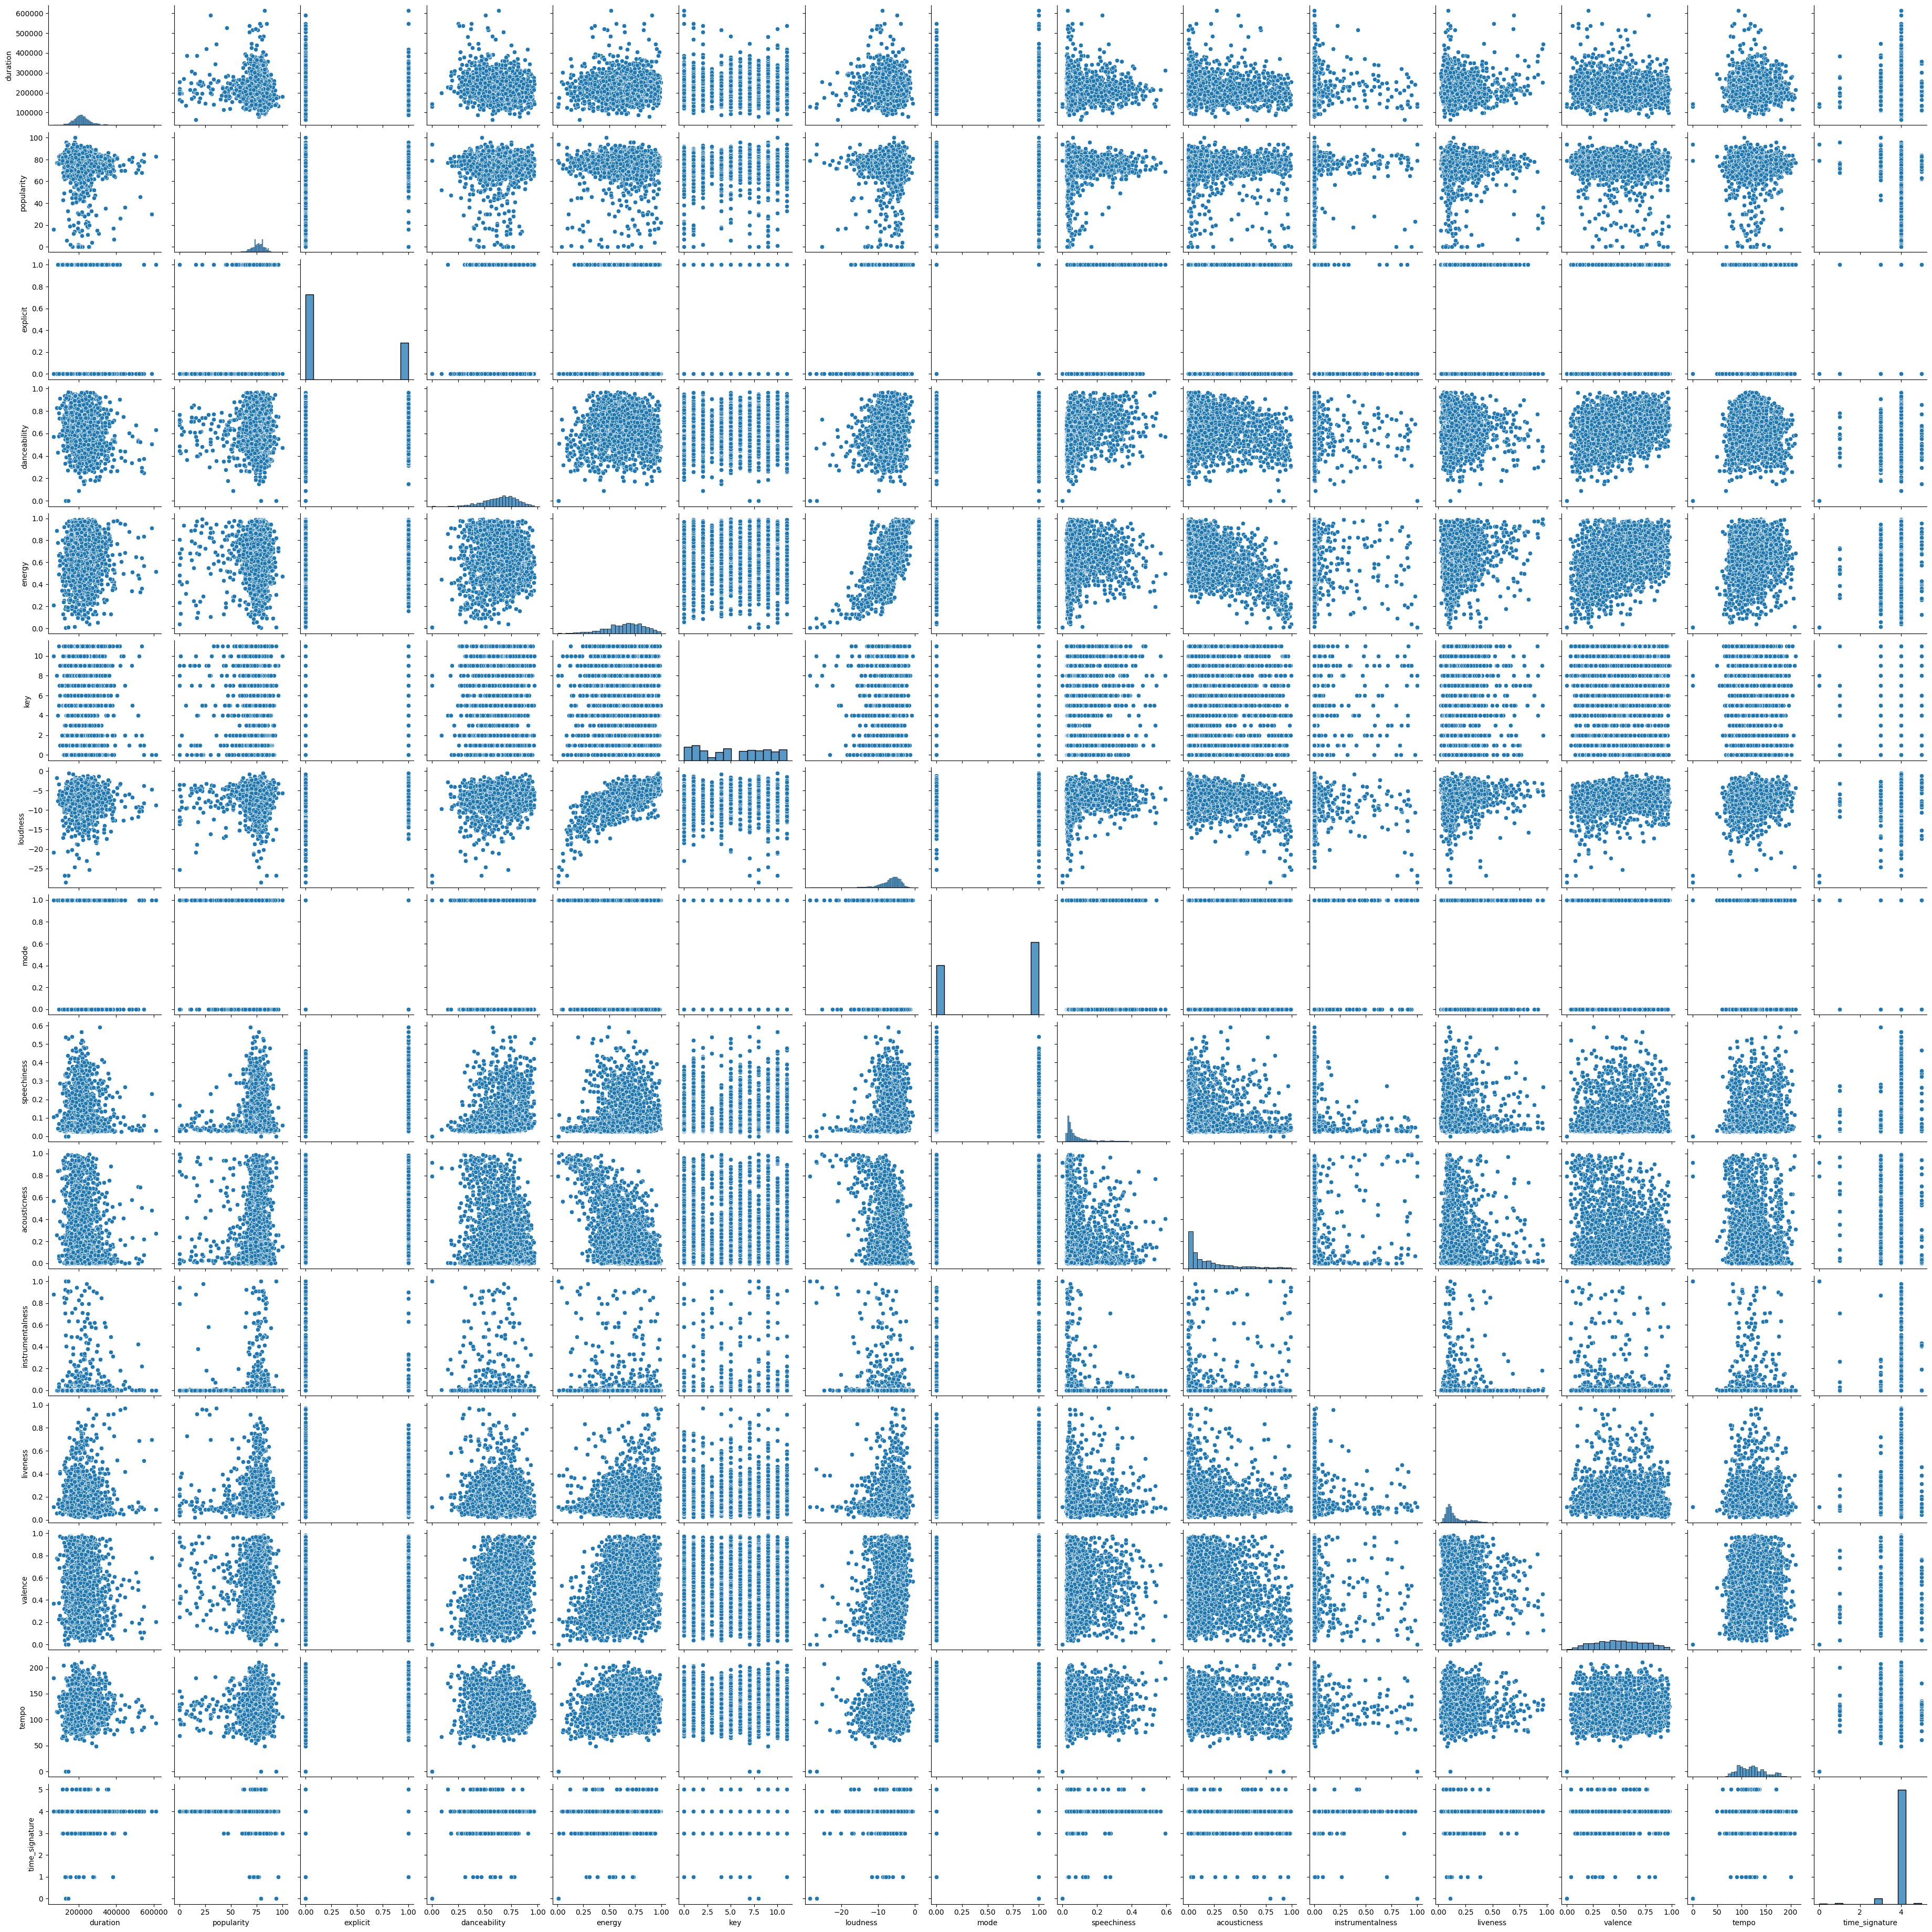

In [24]:
# multivariate EDA (takes 3 min)

# Multivariate analysis- print pairwise scatterplot for each x to y
# Warning: takes a long time to run

# import seaborn as sns
sns.pairplot(df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


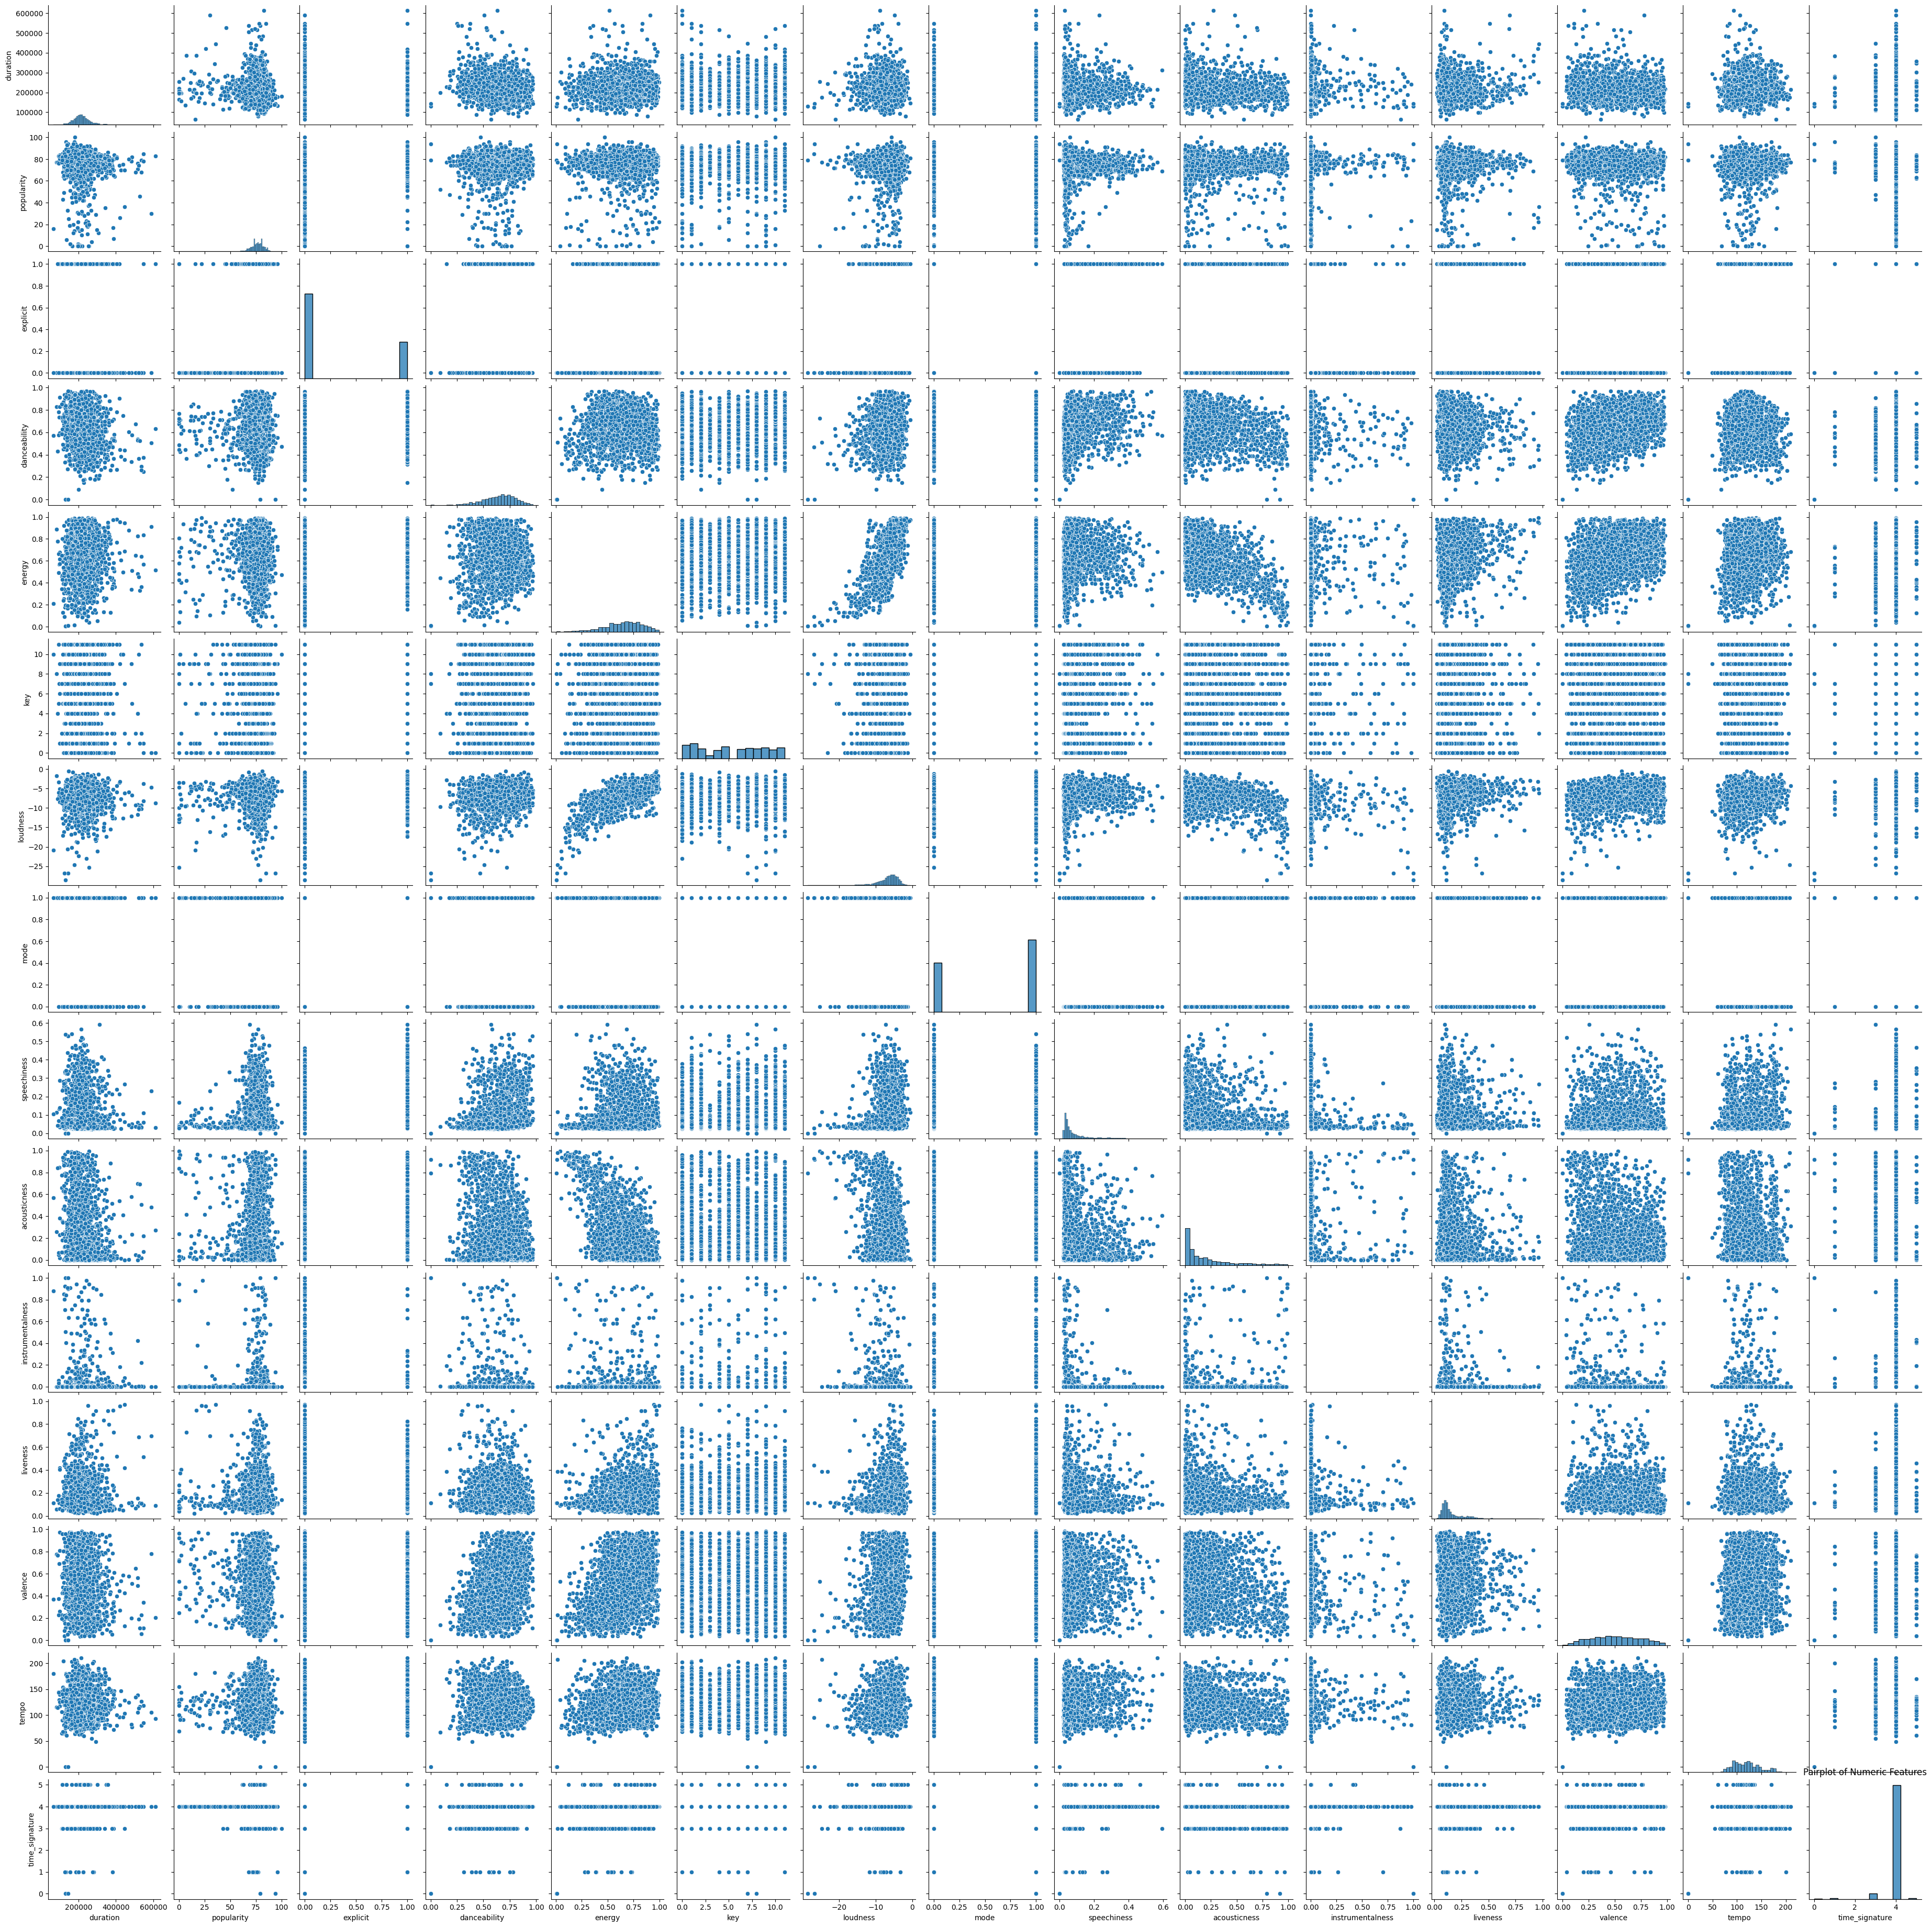

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame containing numeric features

# Select only numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Create pairplot
sns.pairplot(numeric_features)
plt.title('Pairplot of Numeric Features')
plt.show()

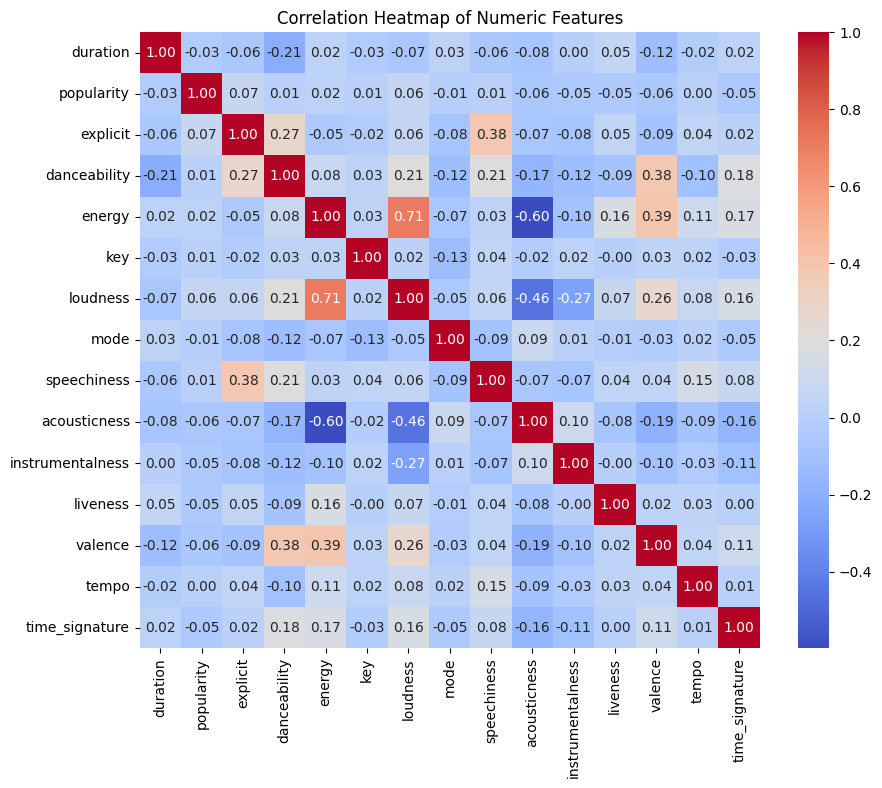

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame containing numeric features

# Select only numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [27]:
# print lyrics for testing
print(df.head())
print(df['lyrics'])

                                      track_name         artist  \
0                                Blinding Lights     The Weeknd   
1                                   Shape of You     Ed Sheeran   
2                              Someone You Loved  Lewis Capaldi   
3  Sunflower - Spider-Man: Into the Spider-Verse    Post Malone   
4                                        Starboy     The Weeknd   

                                     album release_date  duration  popularity  \
0                              After Hours   2020-03-20    200040          90   
1                               ÷ (Deluxe)   2017-03-03    233712          86   
2  Divinely Uninspired To A Hellish Extent   2019-05-17    182160          89   
3                     Hollywood's Bleeding   2019-09-06    157560          85   
4                                  Starboy   2016-11-25    230453          91   

   explicit                                             lyrics  danceability  \
0         0  234 ContributorsT

In [32]:
df.to_csv('processed_data_without_lyrics.csv', index=False)

In [29]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# from tqdm import tqdm
# import re
# from langdetect import detect
# from contractions import fix
# from nltk.stem import WordNetLemmatizer


# # Download NLTK resources if not already installed
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Initialize WordNet Lemmatizer
# lemmatizer = WordNetLemmatizer()

# # Define a function to check if the text is in English
# def is_english(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False  # Return False if language detection fails

# # Initialize BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def clean_lyrics(lyrics):
#     # Check if the lyrics are a string
#     if isinstance(lyrics, str):
#         if len(lyrics.split('\n', 1)) > 1:
#             # If there are at least two elements after split, get the second element and omit the last 8 characters
#             cleaned_lyrics = lyrics.split('\n', 1)[1][:-8]
#             # Remove square brackets and the content inside them
#             cleaned_lyrics = re.sub(r'\[.*?\]', '', cleaned_lyrics)
#             # Remove round brackets but keep their content intact, replace "\n" with " ", and lowercase every word
#             cleaned_lyrics = re.sub(r'\(|\)', '', cleaned_lyrics).replace("\n", " ").lower()

#             # Remove punctuation
#             cleaned_lyrics = re.sub(r'[^\w\s#]', '', cleaned_lyrics)

#             # Tokenization using BertTokenizer
#             tokens = tokenizer.tokenize(cleaned_lyrics)

#             # Join tokens back into a string
#             cleaned_lyrics = ' '.join(tokens)

#             # strip the spaces
#             cleaned_lyrics = cleaned_lyrics.strip()

#             # Check if the cleaned lyrics are in English
#             return cleaned_lyrics if is_english(cleaned_lyrics) else ''
#         else:
#             return ''  # Return None if split_lyrics has fewer than 2 elements
#     else:
#         return ''  # Return None if lyrics is not a string

# # Load and preprocess data
# # df = pd.read_csv("your_dataset.csv")
# df['lyrics'] = df['lyrics'].apply(clean_lyrics)

In [30]:
# df['lyrics']

In [31]:
# # export it
# df.to_csv('processed_data.csv', index=False)